# Basic data exploration

In [1712]:
import pandas as pd
import numpy as np

In [1713]:
s=pd.read_csv("may-october(5 min).csv")

In [1714]:
s.columns

Index(['Time', 'InverterSN', 'Data LoggerSN', 'Alert Details', 'Alert Code',
       'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)', 'AC Voltage T/W/C(V)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 'Grid Power Factor',
       'Inverter Temperature(℃)', 'Inverter Status',
       'Generation Yesterday(kWh)', 'System Time'],
      dtype='object')

In [1715]:
s['InverterSN'].unique

<bound method Series.unique of 0        110470185160082
1        110470185160082
2        110470185160082
3        110470185160082
4        110470185160082
              ...       
23272    110470185160082
23273    110470185160082
23274    110470185160082
23275    110470185160082
23276    110470185160082
Name: InverterSN, Length: 23277, dtype: int64>

In [1716]:
s['InverterSN'].value_counts()

110470185160082    23277
Name: InverterSN, dtype: int64

In [1717]:
s['Data LoggerSN'].unique

<bound method Series.unique of 0        706238511
1        706238511
2        706238511
3        706238511
4        706238511
           ...    
23272    706238511
23273    706238511
23274    706238511
23275    706238511
23276    706238511
Name: Data LoggerSN, Length: 23277, dtype: int64>

In [1718]:
s['Data LoggerSN'].value_counts()

706238511    23277
Name: Data LoggerSN, dtype: int64

In [1719]:
s['Inverter Status'].unique

<bound method Series.unique of 0        1022
1        1022
2        1022
3        1022
4        1022
         ... 
23272    1022
23273    1022
23274    1022
23275    1022
23276    1022
Name: Inverter Status, Length: 23277, dtype: object>

In [1720]:
s['Inverter Status'].value_counts()

1022       22835
1025         415
Standby       27
Name: Inverter Status, dtype: int64

In [1721]:
x=s.columns
l=[]
for i in range(1,len(x)-1):
    l.append(s[x[i]].value_counts())
for i in l:
    print(i)

110470185160082    23277
Name: InverterSN, dtype: int64
706238511    23277
Name: Data LoggerSN, dtype: int64
N    329
G     86
Name: Alert Details, dtype: int64
1015H    329
1012H     78
1010H      5
1011H      3
Name: Alert Code, dtype: int64
200.1    142
632.1    119
200.0    119
640.1    117
624.0    116
        ... 
305.5      1
732.8      1
135.4      1
285.4      1
193.3      1
Name: DC Voltage PV1(V), Length: 2456, dtype: int64
200.1    116
200.0    101
616.1     86
612.1     82
643.9     82
        ... 
549.3      1
394.3      1
163.6      1
207.4      1
258.8      1
Name: DC Voltage PV2(V), Length: 2355, dtype: int64
200.1    154
200.0    148
620.0    118
636.1    115
632.1    112
        ... 
454.9      1
505.7      1
506.0      1
506.3      1
184.9      1
Name: DC Voltage PV3(V), Length: 2582, dtype: int64
200.0    173
671.9    130
672.1    129
200.1    129
672.0    127
        ... 
146.2      1
243.1      1
405.5      1
504.7      1
188.8      1
Name: DC Voltage PV4(V), Len

Conclusion:Alert details, Alert code, Grid power factor, Inverter status attributes doesnt have much unique values

In [1722]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1723]:
pd.pandas.set_option('display.max_columns',None)

In [1724]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in s.columns if s[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(s[feature].isnull().mean(), 4),  ' % missing values')


Alert Details 0.9822  % missing values
Alert Code 0.9822  % missing values
System Time 0.0003  % missing values


Since there are many missing values, we need to find the relationship between missing values and the power generated
Let's plot some diagram for this relationship

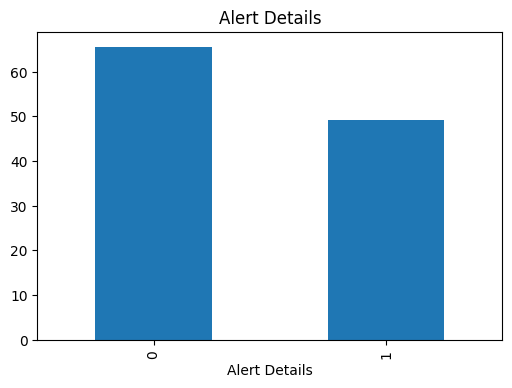

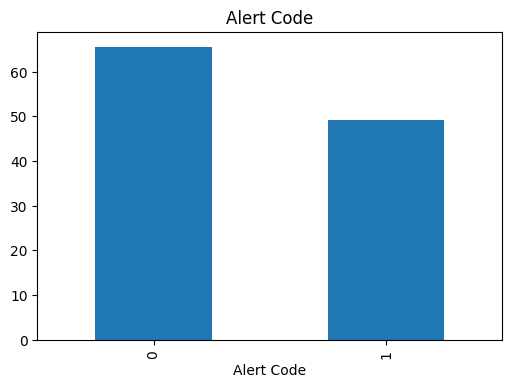

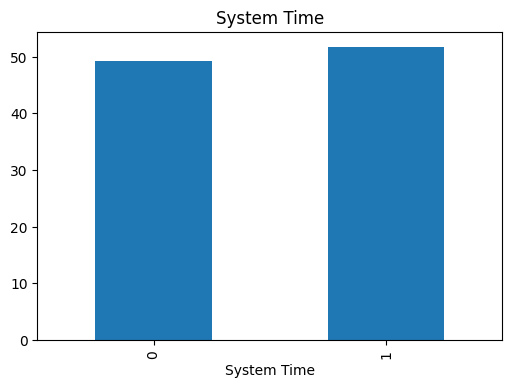

In [1725]:
for feature in features_with_na:
    data = s.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['Daily Generation (Active)(kWh)'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We can see that the missing values are not affecting the power generated much. 


In [1726]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = s.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


corr_features = correlation(s, 0.7)
len(set(corr_features))

corr_features

s1=s.drop(corr_features,axis=1)

C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\957711147.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = s.corr()


In [1727]:
s1.columns

Index(['Time', 'InverterSN', 'Data LoggerSN', 'Alert Details', 'Alert Code',
       'DC Voltage PV1(V)', 'DC Current1(A)', 'AC Voltage R/U/A(V)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Grid Power Factor', 'Inverter Status', 'Generation Yesterday(kWh)',
       'System Time'],
      dtype='object')

In [1728]:
s=s[['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)', 'AC Voltage T/W/C(V)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)',
       'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)']]

In [1729]:
s.head(10)

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Inverter Temperature(℃),Generation Yesterday(kWh)
0,2022/05/02 05:55,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,236.8,236.2,236.2,0.0,0.0,0.0,20,50.00,3164,0.0,117029.0,80,32.9,126.9
1,2022/05/02 06:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,235.5,237.4,236.8,0.1,0.1,0.1,30,50.10,3164,0.0,117029.0,20,34.1,126.9
2,2022/05/02 06:05,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,237.7,237.1,236.2,0.2,0.2,0.2,40,50.11,3164,0.0,117029.0,30,34.4,126.9
3,2022/05/02 06:12,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,237.1,236.8,235.8,0.4,0.4,0.4,200,50.01,3164,0.0,117029.0,190,34.9,126.9
4,2022/05/02 06:17,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,237.1,239.6,239.3,0.5,0.5,0.5,160,50.06,3164,0.0,117029.0,160,35.3,126.9
5,2022/05/02 06:22,268.1,603.6,267.8,252.1,0.2,0.4,0.2,0.2,399,233.9,235.5,236.5,0.5,0.5,0.5,220,50.05,3164,0.1,117029.0,240,35.4,126.9
6,2022/05/02 06:27,548.0,611.8,523.9,452.3,0.3,0.5,0.3,0.3,763,235.2,236.5,235.8,0.9,0.9,0.9,500,50.03,3164,0.1,117029.0,480,35.7,126.9
7,2022/05/02 06:33,616.0,624.0,632.1,664.1,0.3,0.6,0.3,0.3,948,236.2,236.5,233.9,1.3,1.4,1.3,740,49.99,3164,0.1,117029.0,710,36.1,126.9
8,2022/05/02 06:38,628.1,628.0,628.3,660.0,0.4,0.8,0.4,0.4,1268,234.6,236.8,236.2,1.8,1.7,1.7,1080,50.06,3164,0.2,117029.0,1080,36.5,126.9
9,2022/05/02 06:43,627.8,635.3,628.1,667.7,0.6,1.0,0.6,0.5,1722,235.2,236.8,235.8,2.4,2.4,2.3,1540,50.01,3164,0.3,117029.0,1530,36.8,126.9


# Converting to datetime

In [1730]:
s.dtypes

Time                                       object
DC Voltage PV1(V)                         float64
DC Voltage PV2(V)                         float64
DC Voltage PV3(V)                         float64
DC Voltage PV4(V)                         float64
DC Current1(A)                            float64
DC Current2(A)                            float64
DC Current3(A)                            float64
DC Current4(A)                            float64
Total DC Input Power(W)                     int64
AC Voltage R/U/A(V)                       float64
AC Voltage S/V/B(V)                       float64
AC Voltage T/W/C(V)                       float64
AC Current R/U/A(A)                       float64
AC Current S/V/B(A)                       float64
AC Current T/W/C(A)                       float64
AC Output Total Power (Active)(W)           int64
AC Output Frequency R(Hz)                 float64
Generation of Last Month (Active)(kWh)      int64
Daily Generation (Active)(kWh)            float64


In [1731]:
def obj_to_DT(s,x):
    s.loc[:,x] = s[x].astype('string')
    s[x]= pd.to_datetime(s[x])
    return s

In [1732]:
s=obj_to_DT(s,'Time')
s.dtypes

C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\2101962903.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  s.loc[:,x] = s[x].astype('string')


Time                                      datetime64[ns]
DC Voltage PV1(V)                                float64
DC Voltage PV2(V)                                float64
DC Voltage PV3(V)                                float64
DC Voltage PV4(V)                                float64
DC Current1(A)                                   float64
DC Current2(A)                                   float64
DC Current3(A)                                   float64
DC Current4(A)                                   float64
Total DC Input Power(W)                            int64
AC Voltage R/U/A(V)                              float64
AC Voltage S/V/B(V)                              float64
AC Voltage T/W/C(V)                              float64
AC Current R/U/A(A)                              float64
AC Current S/V/B(A)                              float64
AC Current T/W/C(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)      

# Outlier analysis and removal

In [1733]:
from datetime import date

In [1734]:
dates=s
t=dates['Time'].apply(lambda x: x.date()).value_counts()# checking outliers
t

2022-06-07    174
2022-06-14    169
2022-06-08    168
2022-08-03    165
2022-06-05    163
             ... 
2022-05-27    108
2022-09-29    105
2022-06-29     82
2022-10-05     19
2022-10-06      5
Name: Time, Length: 159, dtype: int64

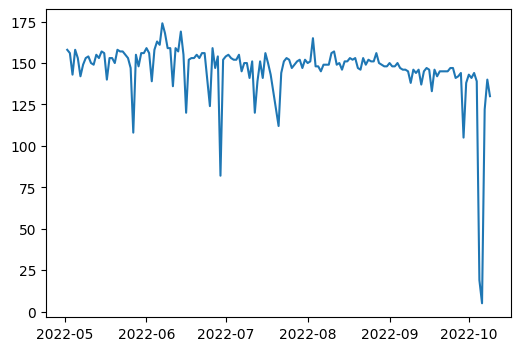

In [1735]:
import matplotlib.pyplot as plt
t.plot()
plt.show()

In [1736]:
outliersN=pd.read_csv("outliers2.csv") # outliers removed using excel
outliersN

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Inverter Temperature(℃),Generation Yesterday(kWh)
0,2022/05/02 05:55,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,236.8,236.2,236.2,0.0,0.0,0.0,20,50.00,3164,0.0,117029,80,32.9,126.9
1,2022/05/02 06:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,235.5,237.4,236.8,0.1,0.1,0.1,30,50.10,3164,0.0,117029,20,34.1,126.9
2,2022/05/02 06:05,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,237.7,237.1,236.2,0.2,0.2,0.2,40,50.11,3164,0.0,117029,30,34.4,126.9
3,2022/05/02 06:12,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,237.1,236.8,235.8,0.4,0.4,0.4,200,50.01,3164,0.0,117029,190,34.9,126.9
4,2022/05/02 06:17,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,237.1,239.6,239.3,0.5,0.5,0.5,160,50.06,3164,0.0,117029,160,35.3,126.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23248,2022/10/09 17:53,200.0,546.6,200.0,200.0,0.1,0.1,0.1,0.1,114,248.2,249.2,248.9,0.1,0.1,0.1,20,49.99,2835,82.4,133462,80,37.8,131.9
23249,2022/10/09 17:58,199.9,200.1,476.1,509.6,0.1,0.1,0.1,0.1,138,246.9,248.2,249.5,0.0,0.0,0.0,20,50.03,2835,82.4,133462,70,37.6,131.9
23250,2022/10/09 18:03,457.3,200.0,476.3,509.6,0.1,0.1,0.1,0.1,164,245.7,247.9,249.5,0.0,0.0,0.0,20,50.06,2835,82.4,133462,140,37.4,131.9
23251,2022/10/09 18:09,437.6,420.4,382.1,389.7,0.1,0.1,0.1,0.1,162,243.8,246.0,247.9,0.0,0.0,0.0,20,49.96,2835,82.4,133462,140,37.1,131.9


In [1737]:
from datetime import time,date

In [1738]:
outliersN['Time']= pd.to_datetime(outliersN['Time'])#converted time to string
outliersN.dtypes

Time                                      datetime64[ns]
DC Voltage PV1(V)                                float64
DC Voltage PV2(V)                                float64
DC Voltage PV3(V)                                float64
DC Voltage PV4(V)                                float64
DC Current1(A)                                   float64
DC Current2(A)                                   float64
DC Current3(A)                                   float64
DC Current4(A)                                   float64
Total DC Input Power(W)                            int64
AC Voltage R/U/A(V)                              float64
AC Voltage S/V/B(V)                              float64
AC Voltage T/W/C(V)                              float64
AC Current R/U/A(A)                              float64
AC Current S/V/B(A)                              float64
AC Current T/W/C(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)      

In [1739]:
import datetime
outliersN['Time']= pd.to_datetime(outliersN['Time'],dayfirst=True)
outliersN

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Inverter Temperature(℃),Generation Yesterday(kWh)
0,2022-05-02 05:55:00,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,236.8,236.2,236.2,0.0,0.0,0.0,20,50.00,3164,0.0,117029,80,32.9,126.9
1,2022-05-02 06:00:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,235.5,237.4,236.8,0.1,0.1,0.1,30,50.10,3164,0.0,117029,20,34.1,126.9
2,2022-05-02 06:05:00,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,237.7,237.1,236.2,0.2,0.2,0.2,40,50.11,3164,0.0,117029,30,34.4,126.9
3,2022-05-02 06:12:00,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,237.1,236.8,235.8,0.4,0.4,0.4,200,50.01,3164,0.0,117029,190,34.9,126.9
4,2022-05-02 06:17:00,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,237.1,239.6,239.3,0.5,0.5,0.5,160,50.06,3164,0.0,117029,160,35.3,126.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23248,2022-10-09 17:53:00,200.0,546.6,200.0,200.0,0.1,0.1,0.1,0.1,114,248.2,249.2,248.9,0.1,0.1,0.1,20,49.99,2835,82.4,133462,80,37.8,131.9
23249,2022-10-09 17:58:00,199.9,200.1,476.1,509.6,0.1,0.1,0.1,0.1,138,246.9,248.2,249.5,0.0,0.0,0.0,20,50.03,2835,82.4,133462,70,37.6,131.9
23250,2022-10-09 18:03:00,457.3,200.0,476.3,509.6,0.1,0.1,0.1,0.1,164,245.7,247.9,249.5,0.0,0.0,0.0,20,50.06,2835,82.4,133462,140,37.4,131.9
23251,2022-10-09 18:09:00,437.6,420.4,382.1,389.7,0.1,0.1,0.1,0.1,162,243.8,246.0,247.9,0.0,0.0,0.0,20,49.96,2835,82.4,133462,140,37.1,131.9


In [1740]:
outliersN.head(10)

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Inverter Temperature(℃),Generation Yesterday(kWh)
0,2022-05-02 05:55:00,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,236.8,236.2,236.2,0.0,0.0,0.0,20,50.00,3164,0.0,117029,80,32.9,126.9
1,2022-05-02 06:00:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,235.5,237.4,236.8,0.1,0.1,0.1,30,50.10,3164,0.0,117029,20,34.1,126.9
2,2022-05-02 06:05:00,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,237.7,237.1,236.2,0.2,0.2,0.2,40,50.11,3164,0.0,117029,30,34.4,126.9
3,2022-05-02 06:12:00,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,237.1,236.8,235.8,0.4,0.4,0.4,200,50.01,3164,0.0,117029,190,34.9,126.9
4,2022-05-02 06:17:00,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,237.1,239.6,239.3,0.5,0.5,0.5,160,50.06,3164,0.0,117029,160,35.3,126.9
5,2022-05-02 06:22:00,268.1,603.6,267.8,252.1,0.2,0.4,0.2,0.2,399,233.9,235.5,236.5,0.5,0.5,0.5,220,50.05,3164,0.1,117029,240,35.4,126.9
6,2022-05-02 06:27:00,548.0,611.8,523.9,452.3,0.3,0.5,0.3,0.3,763,235.2,236.5,235.8,0.9,0.9,0.9,500,50.03,3164,0.1,117029,480,35.7,126.9
7,2022-05-02 06:33:00,616.0,624.0,632.1,664.1,0.3,0.6,0.3,0.3,948,236.2,236.5,233.9,1.3,1.4,1.3,740,49.99,3164,0.1,117029,710,36.1,126.9
8,2022-05-02 06:38:00,628.1,628.0,628.3,660.0,0.4,0.8,0.4,0.4,1268,234.6,236.8,236.2,1.8,1.7,1.7,1080,50.06,3164,0.2,117029,1080,36.5,126.9
9,2022-05-02 06:43:00,627.8,635.3,628.1,667.7,0.6,1.0,0.6,0.5,1722,235.2,236.8,235.8,2.4,2.4,2.3,1540,50.01,3164,0.3,117029,1530,36.8,126.9


# Converting to 1 HR intervals

In [1741]:
outliersN.set_index('Time',inplace= True)
print(outliersN)

                     DC Voltage PV1(V)  DC Voltage PV2(V)  DC Voltage PV3(V)  \
Time                                                                           
2022-05-02 05:55:00               92.2              165.4               94.8   
2022-05-02 06:00:00              200.1              236.2              200.1   
2022-05-02 06:05:00              207.8              344.2              216.1   
2022-05-02 06:12:00              228.1              596.1              228.0   
2022-05-02 06:17:00              240.1              608.1              240.1   
...                                ...                ...                ...   
2022-10-09 17:53:00              200.0              546.6              200.0   
2022-10-09 17:58:00              199.9              200.1              476.1   
2022-10-09 18:03:00              457.3              200.0              476.3   
2022-10-09 18:09:00              437.6              420.4              382.1   
2022-10-09 18:14:00              193.3  

In [1742]:

df1=outliersN[['DC Voltage PV1(V)','DC Voltage PV2(V)','DC Voltage PV3(V)',
'DC Voltage PV4(V)','AC Voltage R/U/A(V)','AC Voltage S/V/B(V)',
'AC Voltage T/W/C(V)','AC Output Frequency R(Hz)','Generation of Last Month (Active)(kWh)',
'Inverter Temperature(℃)','Generation Yesterday(kWh)']]
df1=df1.resample("H").mean()

df2=outliersN[['DC Current1(A)','DC Current2(A)','DC Current3(A)',
'DC Current4(A)','Total DC Input Power(W)','AC Current R/U/A(A)',
'AC Current S/V/B(A)','AC Current T/W/C(A)',
'AC Output Total Power (Active)(W)','Power Grid Total Apparent Power(VA)']]
df2=df2.resample("H").sum()
print(df2)

df3=outliersN[['Total Generation (Active)(kWh)','Daily Generation (Active)(kWh)']]
df3=df3.resample("H").max()
print(df3)

                     DC Current1(A)  DC Current2(A)  DC Current3(A)  \
Time                                                                  
2022-05-02 05:00:00             0.1             0.1             0.1   
2022-05-02 06:00:00             5.0             8.8             4.9   
2022-05-02 07:00:00            18.2            30.6            17.5   
2022-05-02 08:00:00            39.6            76.5            39.7   
2022-05-02 09:00:00            52.4           102.9            52.3   
...                             ...             ...             ...   
2022-10-09 14:00:00             0.0             0.0             0.0   
2022-10-09 15:00:00            38.1            70.9            36.8   
2022-10-09 16:00:00            19.5            37.6            18.4   
2022-10-09 17:00:00             4.8             8.9             4.6   
2022-10-09 18:00:00             0.3             0.3             0.3   

                     DC Current4(A)  Total DC Input Power(W)  \
Time        

In [1743]:
df1=df1.reset_index()
df2=df2.reset_index()
df3=df3.reset_index()
df1=pd.merge(df1,df2,on='Time')
df1=pd.merge(df1,df3,on='Time')
df1

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Inverter Temperature(℃),Generation Yesterday(kWh),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
0,2022-05-02 05:00:00,92.200000,165.400000,94.800000,86.500000,236.800000,236.200000,236.200000,50.000000,3164.0,32.900000,126.9,0.1,0.1,0.1,0.1,43,0.0,0.0,0.0,20,80,117029.0,0.0
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,36.025000,126.9,5.0,8.8,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,41.400000,126.9,18.2,30.6,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,48.441667,126.9,39.6,76.5,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,56.872727,126.9,52.4,102.9,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,2022-10-09 14:00:00,731.608333,729.033333,732.191667,767.866667,0.000000,0.000000,0.000000,0.000000,2835.0,38.358333,131.9,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,133446.0,67.0
3850,2022-10-09 15:00:00,652.225000,658.508333,663.175000,693.491667,175.350000,176.000000,175.783333,33.358333,2835.0,42.691667,131.9,38.1,70.9,36.8,36.8,114152,140.5,139.6,139.2,110820,110840,133455.0,76.0
3851,2022-10-09 16:00:00,616.900000,634.436364,636.845455,673.309091,255.236364,257.309091,255.709091,49.995455,2835.0,44.054545,131.9,19.5,37.6,18.4,18.6,59444,74.6,74.2,74.0,56970,47870,133461.0,81.2
3852,2022-10-09 17:00:00,552.183333,577.425000,537.316667,581.341667,249.091667,250.383333,250.783333,50.011667,2835.0,39.266667,131.9,4.8,8.9,4.6,4.4,14062,19.0,18.3,17.9,12100,12000,133462.0,82.4


In [1744]:
df1.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Total Generation (Active)(kWh)',
       'Daily Generation (Active)(kWh)'],
      dtype='object')

In [1745]:
#times['actual time']=times['Time'].apply(lambda x: x.time())
#times[times['actual time']==time(6,00,00)]

# Common time interval(6-7)

In [1746]:
from datetime import time
solar=df1[df1['Time'].apply(lambda x: x.time()) < time(19,00,00)]
solar

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Inverter Temperature(℃),Generation Yesterday(kWh),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
0,2022-05-02 05:00:00,92.200000,165.400000,94.800000,86.500000,236.800000,236.200000,236.200000,50.000000,3164.0,32.900000,126.9,0.1,0.1,0.1,0.1,43,0.0,0.0,0.0,20,80,117029.0,0.0
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,36.025000,126.9,5.0,8.8,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,41.400000,126.9,18.2,30.6,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,48.441667,126.9,39.6,76.5,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,56.872727,126.9,52.4,102.9,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,2022-10-09 14:00:00,731.608333,729.033333,732.191667,767.866667,0.000000,0.000000,0.000000,0.000000,2835.0,38.358333,131.9,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,133446.0,67.0
3850,2022-10-09 15:00:00,652.225000,658.508333,663.175000,693.491667,175.350000,176.000000,175.783333,33.358333,2835.0,42.691667,131.9,38.1,70.9,36.8,36.8,114152,140.5,139.6,139.2,110820,110840,133455.0,76.0
3851,2022-10-09 16:00:00,616.900000,634.436364,636.845455,673.309091,255.236364,257.309091,255.709091,49.995455,2835.0,44.054545,131.9,19.5,37.6,18.4,18.6,59444,74.6,74.2,74.0,56970,47870,133461.0,81.2
3852,2022-10-09 17:00:00,552.183333,577.425000,537.316667,581.341667,249.091667,250.383333,250.783333,50.011667,2835.0,39.266667,131.9,4.8,8.9,4.6,4.4,14062,19.0,18.3,17.9,12100,12000,133462.0,82.4


In [1747]:
solar=solar[solar['Time'].apply(lambda x: x.time()) >= time(6,00,00)]
solar

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Inverter Temperature(℃),Generation Yesterday(kWh),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,36.025000,126.9,5.0,8.8,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,41.400000,126.9,18.2,30.6,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,48.441667,126.9,39.6,76.5,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,56.872727,126.9,52.4,102.9,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
5,2022-05-02 10:00:00,605.054545,608.690909,608.763636,642.200000,229.172727,228.072727,227.809091,49.974545,3164.0,57.763636,126.9,49.2,96.1,48.6,48.0,148295,208.2,208.3,207.9,143220,143170,117071.0,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,2022-10-09 14:00:00,731.608333,729.033333,732.191667,767.866667,0.000000,0.000000,0.000000,0.000000,2835.0,38.358333,131.9,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,133446.0,67.0
3850,2022-10-09 15:00:00,652.225000,658.508333,663.175000,693.491667,175.350000,176.000000,175.783333,33.358333,2835.0,42.691667,131.9,38.1,70.9,36.8,36.8,114152,140.5,139.6,139.2,110820,110840,133455.0,76.0
3851,2022-10-09 16:00:00,616.900000,634.436364,636.845455,673.309091,255.236364,257.309091,255.709091,49.995455,2835.0,44.054545,131.9,19.5,37.6,18.4,18.6,59444,74.6,74.2,74.0,56970,47870,133461.0,81.2
3852,2022-10-09 17:00:00,552.183333,577.425000,537.316667,581.341667,249.091667,250.383333,250.783333,50.011667,2835.0,39.266667,131.9,4.8,8.9,4.6,4.4,14062,19.0,18.3,17.9,12100,12000,133462.0,82.4


# Removing few columns in weather dataset

In [1748]:
w=pd.read_csv("weather_data_may_to_oct.csv")
w=w.rename(columns = {'datetime':'Time'})

In [1749]:
w1=w[['Time','temp','dew','humidity','precip','windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','uvindex']]
print(w1)

                     Time  temp   dew  humidity  precip  windgust  windspeed  \
0     2022-05-01T00:00:00  29.5  15.0     41.31     0.0      24.5        8.5   
1     2022-05-01T01:00:00  29.0  15.0     42.56     0.0      29.5        8.5   
2     2022-05-01T02:00:00  27.5  18.2     56.82     0.0      30.6        1.1   
3     2022-05-01T03:00:00  27.0  16.0     50.99     0.0      26.3        8.4   
4     2022-05-01T04:00:00  28.0  17.0     51.25     0.0      23.8       11.2   
...                   ...   ...   ...       ...     ...       ...        ...   
3883  2022-10-09T19:00:00  25.8  21.9     79.31     0.0      20.9       14.1   
3884  2022-10-09T20:00:00  25.1  21.8     81.61     0.0      22.0        9.7   
3885  2022-10-09T21:00:00  24.8  21.9     83.79     0.0      23.8       12.7   
3886  2022-10-09T22:00:00  23.9  21.9     88.59     0.0      27.4        9.4   
3887  2022-10-09T23:00:00  24.3  21.6     85.39     0.0      28.8        4.7   

      winddir  sealevelpressure  cloudc

In [1750]:
w1['Time']= pd.to_datetime(w1['Time'])#converted time to string
w1['Time']= pd.to_datetime(w1['Time'])
w1.dtypes

C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\535805746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1['Time']= pd.to_datetime(w1['Time'])#converted time to string
C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\535805746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w1['Time']= pd.to_datetime(w1['Time'])


Time                datetime64[ns]
temp                       float64
dew                        float64
humidity                   float64
precip                     float64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation               int64
uvindex                      int64
dtype: object

# Merging weather and solar data

In [1751]:
weather=w1

In [1752]:
d1=pd.merge(solar,weather, on='Time')
print(d1)

                    Time  DC Voltage PV1(V)  DC Voltage PV2(V)  \
0    2022-05-02 06:00:00         455.016667         568.625000   
1    2022-05-02 07:00:00         637.527273         645.463636   
2    2022-05-02 08:00:00         625.583333         625.608333   
3    2022-05-02 09:00:00         604.027273         608.400000   
4    2022-05-02 10:00:00         605.054545         608.690909   
...                  ...                ...                ...   
2088 2022-10-09 14:00:00         731.608333         729.033333   
2089 2022-10-09 15:00:00         652.225000         658.508333   
2090 2022-10-09 16:00:00         616.900000         634.436364   
2091 2022-10-09 17:00:00         552.183333         577.425000   
2092 2022-10-09 18:00:00         362.733333         293.066667   

      DC Voltage PV3(V)  DC Voltage PV4(V)  AC Voltage R/U/A(V)  \
0            455.058333         572.833333           235.258333   
1            608.336364         672.427273           234.718182   
2     

In [1753]:
d1

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Inverter Temperature(℃),Generation Yesterday(kWh),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
0,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,36.025000,126.9,5.0,8.8,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9,29.0,19.0,54.83,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0
1,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,41.400000,126.9,18.2,30.6,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3,29.0,20.9,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0
2,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,48.441667,126.9,39.6,76.5,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3,30.7,20.8,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2
3,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,56.872727,126.9,52.4,102.9,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7,32.1,19.3,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5
4,2022-05-02 10:00:00,605.054545,608.690909,608.763636,642.200000,229.172727,228.072727,227.809091,49.974545,3164.0,57.763636,126.9,49.2,96.1,48.6,48.0,148295,208.2,208.3,207.9,143220,143170,117071.0,41.5,33.1,18.2,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2022-10-09 14:00:00,731.608333,729.033333,732.191667,767.866667,0.000000,0.000000,0.000000,0.000000,2835.0,38.358333,131.9,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,133446.0,67.0,29.4,21.0,60.90,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,8
2089,2022-10-09 15:00:00,652.225000,658.508333,663.175000,693.491667,175.350000,176.000000,175.783333,33.358333,2835.0,42.691667,131.9,38.1,70.9,36.8,36.8,114152,140.5,139.6,139.2,110820,110840,133455.0,76.0,28.9,21.6,64.58,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,6
2090,2022-10-09 16:00:00,616.900000,634.436364,636.845455,673.309091,255.236364,257.309091,255.709091,49.995455,2835.0,44.054545,131.9,19.5,37.6,18.4,18.6,59444,74.6,74.2,74.0,56970,47870,133461.0,81.2,28.9,21.5,64.57,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,5
2091,2022-10-09 17:00:00,552.183333,577.425000,537.316667,581.341667,249.091667,250.383333,250.783333,50.011667,2835.0,39.266667,131.9,4.8,8.9,4.6,4.4,14062,19.0,18.3,17.9,12100,12000,133462.0,82.4,28.0,21.1,66.25,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,3


In [1754]:
d1.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Total Generation (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'temp', 'dew', 'humidity', 'precip',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex'],
      dtype='object')

In [1755]:
d1=d1[['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)','AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Daily Generation (Active)(kWh)','Total Generation (Active)(kWh)',
       'temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'uvindex']]

In [1756]:
d1['DC total voltage (v)']=d1['DC Voltage PV1(V)']+d1['DC Voltage PV2(V)']+d1['DC Voltage PV4(V)']+d1['DC Voltage PV3(V)']

In [1757]:
d1['DC total current(A)']=d1['DC Current1(A)']+d1['DC Current2(A)']+d1['DC Current3(A)']+d1['DC Current4(A)']

In [1758]:
d1['AC total voltage (v)']=d1['AC Voltage R/U/A(V)']+d1['AC Voltage S/V/B(V)']+d1['AC Voltage T/W/C(V)']

In [1759]:
d1['AC total current(A)']=d1['AC Current R/U/A(A)']+d1[ 'AC Current S/V/B(A)']+d1[ 'AC Current T/W/C(A)']

In [1760]:
d1=d1[['Time', 'DC total voltage (v)','DC total current(A)',  'Total DC Input Power(W)',
       'AC total voltage (v)','AC total current(A)', 'AC Output Total Power (Active)(W)', 
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Generation of Last Month (Active)(kWh)', 'Daily Generation (Active)(kWh)','Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 
       'temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'uvindex','Daily Generation (Active)(kWh)']]

In [1761]:
d1

,Time,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,Daily Generation (Active)(kWh)
0,2022-05-02 06:00:00,2051.533333,23.6,14059,708.316667,55.2,11690,50.042500,36.025000,3164.0,0.9,117030.0,11600,29.0,19.0,54.83,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0,0.9
1,2022-05-02 07:00:00,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,3164.0,5.3,117034.0,51150,29.0,20.9,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0,5.3
2,2022-05-02 08:00:00,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,3164.0,15.3,117044.0,118680,30.7,20.8,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2,15.3
3,2022-05-02 09:00:00,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,3164.0,28.7,117058.0,153660,32.1,19.3,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5,28.7
4,2022-05-02 10:00:00,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,3164.0,41.5,117071.0,143170,33.1,18.2,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2022-10-09 14:00:00,2960.700000,0.0,0,0.000000,0.0,0,0.000000,38.358333,2835.0,67.0,133446.0,0,29.4,21.0,60.90,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,8,67.0
2089,2022-10-09 15:00:00,2667.400000,182.6,114152,527.133333,419.3,110820,33.358333,42.691667,2835.0,76.0,133455.0,110840,28.9,21.6,64.58,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,6,76.0
2090,2022-10-09 16:00:00,2561.490909,94.1,59444,768.254545,222.8,56970,49.995455,44.054545,2835.0,81.2,133461.0,47870,28.9,21.5,64.57,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,5,81.2
2091,2022-10-09 17:00:00,2248.266667,22.7,14062,750.258333,55.2,12100,50.011667,39.266667,2835.0,82.4,133462.0,12000,28.0,21.1,66.25,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,3,82.4


In [1762]:

d1.feature_names=['Time', 'DC total voltage (v)', 'DC total current(A)',
       'Total DC Input Power(W)', 'AC total voltage (v)',
       'AC total current(A)', 'AC Output Total Power (Active)(W)',
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Power Grid Total Apparent Power(VA)', 'temp', 'dew', 'humidity',
       'precip', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex']

C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\152999302.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d1.feature_names=['Time', 'DC total voltage (v)', 'DC total current(A)',


In [1763]:
d1.target = d1["Daily Generation (Active)(kWh)"] 

C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\1881836277.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d1.target = d1["Daily Generation (Active)(kWh)"]


In [1764]:
d1.columns

Index(['Time', 'DC total voltage (v)', 'DC total current(A)',
       'Total DC Input Power(W)', 'AC total voltage (v)',
       'AC total current(A)', 'AC Output Total Power (Active)(W)',
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 'temp', 'dew', 'humidity',
       'precip', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex',
       'Daily Generation (Active)(kWh)'],
      dtype='object')

In [1765]:
type(d1)

pandas.core.frame.DataFrame

In [1766]:
x = d1.drop("Daily Generation (Active)(kWh)",axis=1)   #Feature Matrix
y = d1["Daily Generation (Active)(kWh)"] 

In [1767]:
x.head()

,Time,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),Generation of Last Month (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
0,2022-05-02 06:00:00,2051.533333,23.6,14059,708.316667,55.2,11690,50.042500,36.025000,3164.0,117030.0,11600,29.0,19.0,54.83,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0
1,2022-05-02 07:00:00,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,3164.0,117034.0,51150,29.0,20.9,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0
2,2022-05-02 08:00:00,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,3164.0,117044.0,118680,30.7,20.8,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2
3,2022-05-02 09:00:00,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,3164.0,117058.0,153660,32.1,19.3,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5
4,2022-05-02 10:00:00,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,3164.0,117071.0,143170,33.1,18.2,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6


In [1768]:
x.corr()

C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\2976989851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corr()


,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),Generation of Last Month (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
DC total voltage (v),1.000000,0.245825,0.270454,-0.060383,0.273204,0.272213,-0.081360,0.173004,0.023814,-0.006786,0.271182,0.033831,0.086863,-0.007479,-0.028379,0.104815,-0.036314,0.078785,-0.038902,0.024761,0.052163,0.165074,0.163935
DC total current(A),0.245825,1.000000,0.998841,0.057360,0.997342,0.998662,0.043571,0.868046,-0.006623,-0.095078,0.998652,0.421786,0.080754,-0.353051,-0.059117,-0.190027,-0.049310,0.062827,0.189456,-0.397689,0.195015,0.645371,0.645799
Total DC Input Power(W),0.270454,0.998841,1.000000,0.060665,0.998381,0.999977,0.045408,0.857558,-0.011507,-0.081804,0.999948,0.404980,0.091287,-0.336547,-0.060102,-0.175789,-0.043002,0.069167,0.191745,-0.383062,0.191735,0.636529,0.637054
AC total voltage (v),-0.060383,0.057360,0.060665,1.000000,0.034892,0.060710,0.837401,-0.031625,-0.239373,0.159833,0.060576,-0.123423,0.056416,0.108808,0.009716,0.058133,0.046601,-0.004300,-0.012858,-0.003284,-0.032942,-0.049673,-0.052729
AC total current(A),0.273204,0.997342,0.998381,0.034892,1.000000,0.998286,0.043998,0.863830,0.006937,-0.094469,0.998259,0.414018,0.090598,-0.343674,-0.060544,-0.178277,-0.048152,0.071259,0.188194,-0.382521,0.193648,0.638879,0.639468
AC Output Total Power (Active)(W),0.272213,0.998662,0.999977,0.060710,0.998286,1.000000,0.044612,0.857007,-0.012182,-0.080523,0.999966,0.404093,0.092628,-0.335564,-0.060481,-0.175291,-0.042813,0.069481,0.192343,-0.382387,0.191580,0.636490,0.637023
AC Output Frequency R(Hz),-0.081360,0.043571,0.045408,0.837401,0.043998,0.044612,1.000000,0.031329,-0.041501,0.016765,0.044565,-0.035592,0.045367,0.045233,0.007473,0.008004,-0.017003,-0.001207,-0.008162,0.000347,-0.008200,-0.033138,-0.035477
Inverter Temperature(℃),0.173004,0.868046,0.857558,-0.031625,0.863830,0.857007,0.031329,1.000000,0.094570,-0.291019,0.857073,0.765218,-0.042244,-0.670837,-0.075402,-0.386053,-0.202723,-0.045422,0.033422,-0.550194,0.273304,0.785622,0.785484
Generation of Last Month (Active)(kWh),0.023814,-0.006623,-0.011507,-0.239373,0.006937,-0.012182,-0.041501,0.094570,1.000000,-0.399180,-0.012203,0.167153,-0.088533,-0.159651,-0.002219,-0.004709,-0.092198,0.088923,-0.049545,-0.072001,0.010929,-0.029609,-0.025792
Total Generation (Active)(kWh),-0.006786,-0.095078,-0.081804,0.159833,-0.094469,-0.080523,0.016765,-0.291019,-0.399180,1.000000,-0.080762,-0.508896,0.338544,0.515874,-0.006337,0.049187,0.008465,0.129428,0.298919,0.287089,-0.114564,-0.059050,-0.057616


C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\1924884825.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = x.corr()


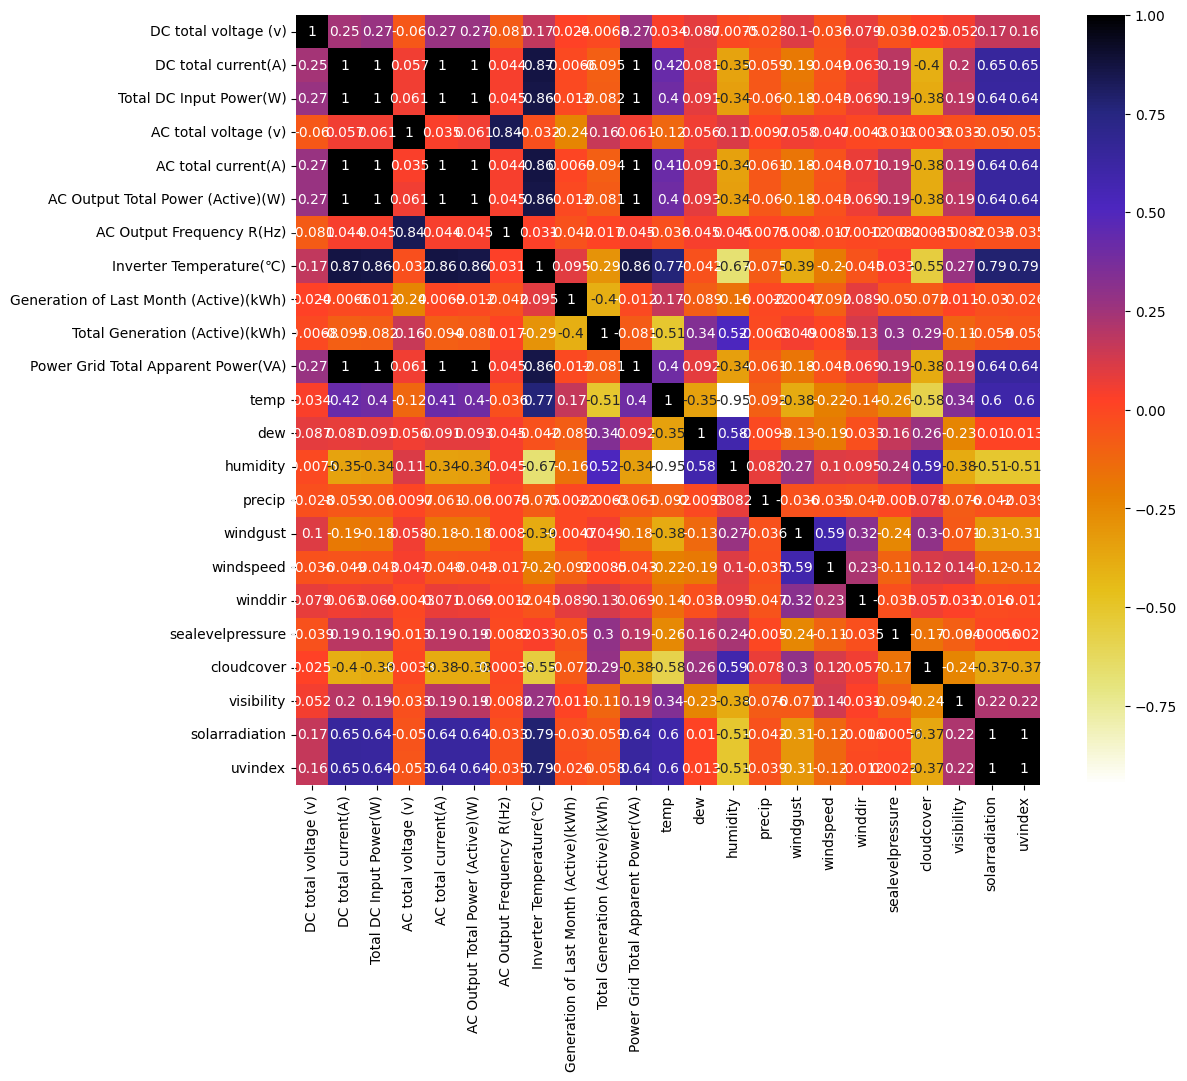

In [1769]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [1770]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = x.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [1771]:
corr_features = correlation(x, 0.8)
len(set(corr_features))

C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\3145941313.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = x.corr()


8

In [1772]:
corr_features

{'AC Output Frequency R(Hz)',
 'AC Output Total Power (Active)(W)',
 'AC total current(A)',
 'Inverter Temperature(℃)',
 'Power Grid Total Apparent Power(VA)',
 'Total DC Input Power(W)',
 'humidity',
 'uvindex'}

In [1773]:
d2=x.drop(corr_features,axis=1)

In [1774]:
d2

,Time,DC total voltage (v),DC total current(A),AC total voltage (v),Generation of Last Month (Active)(kWh),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation
0,2022-05-02 06:00:00,2051.533333,23.6,708.316667,3164.0,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0
1,2022-05-02 07:00:00,2563.754545,83.7,707.018182,3164.0,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22
2,2022-05-02 08:00:00,2534.466667,194.8,711.100000,3164.0,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159
3,2022-05-02 09:00:00,2459.145455,259.4,700.600000,3164.0,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457
4,2022-05-02 10:00:00,2464.709091,241.9,685.054545,3164.0,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2022-10-09 14:00:00,2960.700000,0.0,0.000000,2835.0,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752
2089,2022-10-09 15:00:00,2667.400000,182.6,527.133333,2835.0,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606
2090,2022-10-09 16:00:00,2561.490909,94.1,768.254545,2835.0,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507
2091,2022-10-09 17:00:00,2248.266667,22.7,750.258333,2835.0,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295


In [1775]:
d2.columns

Index(['Time', 'DC total voltage (v)', 'DC total current(A)',
       'AC total voltage (v)', 'Generation of Last Month (Active)(kWh)',
       'Total Generation (Active)(kWh)', 'temp', 'dew', 'precip', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation'],
      dtype='object')

In [1776]:
d= d1.iloc[:,-1:]
d

,Daily Generation (Active)(kWh)
0,0.9
1,5.3
2,15.3
3,28.7
4,41.5
...,...
2088,67.0
2089,76.0
2090,81.2
2091,82.4


In [1777]:
d2=d2.join(d)

In [1778]:
d2.to_csv('finalData.csv')

In [1779]:
d2.drop('Generation of Last Month (Active)(kWh)',axis=1,inplace=True)

In [1780]:
d2

,Time,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,2022-05-02 06:00:00,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,2022-05-02 07:00:00,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2022-05-02 08:00:00,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,2022-05-02 09:00:00,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,2022-05-02 10:00:00,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2022-10-09 14:00:00,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,2022-10-09 15:00:00,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,2022-10-09 16:00:00,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,2022-10-09 17:00:00,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [1781]:
d2.to_csv('finalData.csv')

In [1782]:
final=pd.read_csv("finalData.csv")
final.isnull().sum()

Unnamed: 0                         0
Time                               0
DC total voltage (v)              72
DC total current(A)                0
AC total voltage (v)              72
Total Generation (Active)(kWh)    72
temp                               0
dew                                0
precip                             0
windgust                           0
windspeed                          0
winddir                            0
sealevelpressure                   0
cloudcover                         0
visibility                         0
solarradiation                     0
Daily Generation (Active)(kWh)    72
dtype: int64

In [1783]:
final[final['Daily Generation (Active)(kWh)'].isna()]

,Unnamed: 0,Time,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
325,325,2022-05-27 06:00:00,NaN,0.0,NaN,NaN,26.0,18.0,0.0,33.5,13.0,265.0,1011.0,89.0,5.0,0,NaN
326,326,2022-05-27 07:00:00,NaN,0.0,NaN,NaN,25.1,20.6,0.0,34.9,3.0,329.0,1011.0,55.7,5.0,3,NaN
327,327,2022-05-27 08:00:00,NaN,0.0,NaN,NaN,27.8,20.3,0.0,33.8,6.9,268.0,1009.2,57.6,5.1,12,NaN
328,328,2022-05-27 09:00:00,NaN,0.0,NaN,NaN,29.1,21.9,0.0,31.0,10.7,289.0,1012.0,50.0,6.0,94,NaN
595,595,2022-06-16 16:00:00,NaN,0.0,NaN,NaN,28.4,23.1,0.0,9.4,5.8,270.0,1006.8,50.0,6.0,110,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,2022-10-06 16:00:00,NaN,0.0,NaN,NaN,23.7,21.9,0.0,11.2,12.7,120.0,1006.0,100.0,3.8,63,NaN
2052,2052,2022-10-06 17:00:00,NaN,0.0,NaN,NaN,22.2,21.3,3.0,10.1,1.1,50.0,1005.4,98.4,4.0,13,NaN
2053,2053,2022-10-06 18:00:00,NaN,0.0,NaN,NaN,22.9,21.9,0.0,18.0,5.8,80.0,1007.0,98.4,4.9,7,NaN
2054,2054,2022-10-07 06:00:00,NaN,0.0,NaN,NaN,22.0,21.0,0.0,19.1,7.6,156.3,1009.0,88.0,3.5,0,NaN


In [1784]:
final.dropna(inplace=True)

In [1785]:
final

,Unnamed: 0,Time,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,0,2022-05-02 06:00:00,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,1,2022-05-02 07:00:00,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2,2022-05-02 08:00:00,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,3,2022-05-02 09:00:00,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,4,2022-05-02 10:00:00,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2088,2022-10-09 14:00:00,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,2089,2022-10-09 15:00:00,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,2090,2022-10-09 16:00:00,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,2091,2022-10-09 17:00:00,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [1786]:
final.drop('Unnamed: 0',axis=1,inplace=True)

In [1787]:
final=obj_to_DT(final,'Time')
final.dtypes

C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\2101962903.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  s.loc[:,x] = s[x].astype('string')


Time                              datetime64[ns]
DC total voltage (v)                     float64
DC total current(A)                      float64
AC total voltage (v)                     float64
Total Generation (Active)(kWh)           float64
temp                                     float64
dew                                      float64
precip                                   float64
windgust                                 float64
windspeed                                float64
winddir                                  float64
sealevelpressure                         float64
cloudcover                               float64
visibility                               float64
solarradiation                             int64
Daily Generation (Active)(kWh)           float64
dtype: object

In [1788]:
final.insert(1,'Date',final['Time'].apply(lambda x: x.date()))
final

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,2022-05-02 06:00:00,2022-05-02,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,2022-05-02 07:00:00,2022-05-02,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2022-05-02 08:00:00,2022-05-02,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,2022-05-02 09:00:00,2022-05-02,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,2022-05-02 10:00:00,2022-05-02,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2022-10-09 14:00:00,2022-10-09,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,2022-10-09 15:00:00,2022-10-09,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,2022-10-09 16:00:00,2022-10-09,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,2022-10-09 17:00:00,2022-10-09,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [1789]:
final['Time']=final['Time'].apply(lambda x: x.time())
final

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,06:00:00,2022-05-02,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,07:00:00,2022-05-02,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,08:00:00,2022-05-02,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,09:00:00,2022-05-02,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,10:00:00,2022-05-02,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,14:00:00,2022-10-09,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,15:00:00,2022-10-09,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,16:00:00,2022-10-09,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,17:00:00,2022-10-09,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [1790]:
final=obj_to_DT(final,'Date')
final.dtypes

C:\Users\vaish\AppData\Local\Temp\ipykernel_21388\2101962903.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  s.loc[:,x] = s[x].astype('string')


Time                                      object
Date                              datetime64[ns]
DC total voltage (v)                     float64
DC total current(A)                      float64
AC total voltage (v)                     float64
Total Generation (Active)(kWh)           float64
temp                                     float64
dew                                      float64
precip                                   float64
windgust                                 float64
windspeed                                float64
winddir                                  float64
sealevelpressure                         float64
cloudcover                               float64
visibility                               float64
solarradiation                             int64
Daily Generation (Active)(kWh)           float64
dtype: object

In [1791]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
final['Time']= label_encoder.fit_transform(final['Time'])

In [1792]:
final['Date']= final['Date'].apply(lambda x: x.date() - date(year=2022,month=1,day=1))


In [1793]:
final

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,0,121 days,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,1,121 days,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2,121 days,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,3,121 days,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,4,121 days,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,8,281 days,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,9,281 days,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,10,281 days,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,11,281 days,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [1794]:
final['Date']= final['Date'].apply(lambda x: str(x))

In [1795]:
final

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,0,121 days 00:00:00,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,1,121 days 00:00:00,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2,121 days 00:00:00,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,3,121 days 00:00:00,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,4,121 days 00:00:00,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,8,281 days 00:00:00,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,9,281 days 00:00:00,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,10,281 days 00:00:00,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,11,281 days 00:00:00,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [1796]:
final['Date']= final['Date'].apply(lambda x: int(x[0:3]))

In [1797]:
final.dtypes

Time                                int32
Date                                int64
DC total voltage (v)              float64
DC total current(A)               float64
AC total voltage (v)              float64
Total Generation (Active)(kWh)    float64
temp                              float64
dew                               float64
precip                            float64
windgust                          float64
windspeed                         float64
winddir                           float64
sealevelpressure                  float64
cloudcover                        float64
visibility                        float64
solarradiation                      int64
Daily Generation (Active)(kWh)    float64
dtype: object

In [1798]:
final

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,0,121,2051.533333,23.6,708.316667,117030.0,29.0,19.0,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,1,121,2563.754545,83.7,707.018182,117034.0,29.0,20.9,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2,121,2534.466667,194.8,711.100000,117044.0,30.7,20.8,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,3,121,2459.145455,259.4,700.600000,117058.0,32.1,19.3,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,4,121,2464.709091,241.9,685.054545,117071.0,33.1,18.2,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,8,281,2960.700000,0.0,0.000000,133446.0,29.4,21.0,0.0,12.2,6.7,100.0,1008.4,63.8,7.8,752,67.0
2089,9,281,2667.400000,182.6,527.133333,133455.0,28.9,21.6,0.0,13.0,10.1,90.0,1010.0,50.0,6.0,606,76.0
2090,10,281,2561.490909,94.1,768.254545,133461.0,28.9,21.5,0.0,14.0,10.0,116.0,1010.2,50.0,6.0,507,81.2
2091,11,281,2248.266667,22.7,750.258333,133462.0,28.0,21.1,0.0,17.3,2.3,103.0,1008.5,83.5,7.9,295,82.4


In [1799]:
final.isnull().sum()

Time                              0
Date                              0
DC total voltage (v)              0
DC total current(A)               0
AC total voltage (v)              0
Total Generation (Active)(kWh)    0
temp                              0
dew                               0
precip                            0
windgust                          0
windspeed                         0
winddir                           0
sealevelpressure                  0
cloudcover                        0
visibility                        0
solarradiation                    0
Daily Generation (Active)(kWh)    0
dtype: int64

In [1800]:
final.rename(columns = {'Date':'no_of_days'}, inplace = True)

# Fitting model

In [1801]:
X=final.drop('Daily Generation (Active)(kWh)',axis=1)
Y=final['Daily Generation (Active)(kWh)']

In [1802]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y)

## Linear regression.

In [1803]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)
y_predict=l.predict(x_test)

In [1804]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_true=y_test,y_pred=y_predict)
mse

241.92987603403128

In [1805]:
import math
rmse=math.sqrt(mse)
rmse

15.554095153175297

In [1806]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test,y_pred=y_predict))

0.8759197902847718


In [1807]:
x_test.shape

(506, 16)

In [1808]:
y_test.shape

(506,)

In [1809]:
y_predict.shape

(506,)

In [1810]:
x_test

,Time,no_of_days,DC total voltage (v),DC total current(A),AC total voltage (v),Total Generation (Active)(kWh),temp,dew,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation
1483,1,235,2607.175000,83.8,725.608333,128906.0,22.2,22.0,0.0,28.1,7.6,288.0,1012.0,50.0,6.0,9
1583,10,242,2555.127273,134.0,721.245455,129876.0,29.3,23.2,0.0,10.4,9.1,120.0,1008.0,83.4,6.0,706
1675,11,249,1941.233333,7.3,719.333333,130664.0,24.6,23.8,12.0,7.9,8.1,347.0,1006.1,99.9,3.3,98
1301,1,221,2599.816667,45.8,701.075000,127439.0,22.1,20.9,0.0,34.6,15.9,259.0,1003.0,100.0,5.0,7
1092,0,205,1916.783333,12.9,706.800000,125930.0,21.1,21.0,0.0,37.4,8.6,269.0,1010.0,98.4,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,5,178,2480.372727,358.5,696.800000,123853.0,27.4,22.4,0.0,33.5,7.4,264.0,1006.9,89.1,5.1,656
1714,11,252,2103.350000,10.2,714.233333,130865.0,23.1,22.1,0.0,20.5,8.3,319.0,1003.5,100.0,4.8,48
1353,1,225,2332.590909,21.5,729.636364,127830.0,23.8,22.0,0.0,33.5,12.4,253.0,1009.2,98.4,5.9,3
256,9,140,2539.750000,148.6,734.625000,119396.0,30.1,20.9,0.0,18.4,9.7,276.0,1005.2,89.1,6.0,616


In [1811]:
y_test

1483      4.7
1583    142.8
1675    101.7
1301      2.5
1092      0.4
        ...  
746      52.3
1714     58.3
1353      1.0
256      94.5
2065     41.6
Name: Daily Generation (Active)(kWh), Length: 506, dtype: float64

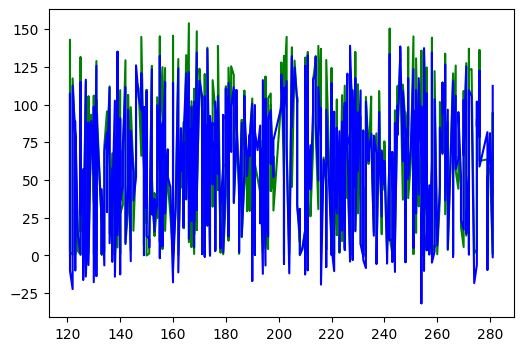

In [1812]:
import matplotlib.pyplot as plt
tt=x_test.sort_values(by='no_of_days')
plt.plot(tt['no_of_days'],y_test,color="green")
plt.plot(tt['no_of_days'],y_predict,color='blue')

In [1813]:
#date1=int(input('Enter from date:'))
#month1=int(input('Enter from month:'))

#date2=int(input('Enter to date:'))
#month2=int(input('Enter to month:'))


## Decision Tree

In [1814]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=3)
dt.fit(x_train,y_train)
y_predict1=dt.predict(x_test)

In [1815]:
r2_score(y_true=y_test,y_pred=y_predict1)

0.8241064396683742

In [1816]:
mse1=mean_squared_error(y_true=y_test,y_pred=y_predict1)
mse1

342.95483013671964

# Gradient Boost

In [1817]:
from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 1)
gb.fit(x_train,y_train)
y_predict2=gb.predict(x_test)

In [1818]:
r2_score(y_true=y_test,y_pred=y_predict2)

0.9059681347710747

In [1819]:
mse1=mean_squared_error(y_true=y_test,y_pred=y_predict2)
mse1

183.34202972652346

In [1820]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb= xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
 
# Fitting the model
xgb.fit(x_train, y_train)
 
# Predict the model
pred = xgb.predict(x_test)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
r2_score(y_true=y_test,y_pred=pred)

[22:17:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  11.238840


0.9352177607330157

# Comparing algorithms

In [1821]:
#linear regression
y_fitted_l=l.predict(X)
residual_l=y_fitted_l-Y
corr_l=np.corrcoef(y_fitted_l,Y)
print('correlation coefficient: ',corr_l[0,1])

correlation coefficient:  0.9359088831135907


In [1822]:
#decision tree
y_fitted_dt=dt.predict(X)
residual_dt=y_fitted_dt-Y
corr_dt=np.corrcoef(y_fitted_dt,Y)
print('correlation coefficient: ',corr_dt[0,1])

correlation coefficient:  0.9214601445296665


In [1823]:
#gradient boost
y_fitted_gb=gb.predict(X)
residual_gb=y_fitted_gb-Y
corr_gb=np.corrcoef(y_fitted_gb,Y)
print('correlation coefficient: ',corr_gb[0,1])

correlation coefficient:  0.9534463535337553


In [1824]:
#xgboost
y_fitted_xgb=xgb.predict(X)
residual_xgb=y_fitted_xgb-Y
corr_xgb=np.corrcoef(y_fitted_xgb,Y)
print('correlation coefficient: ',corr_xgb[0,1])

correlation coefficient:  0.9853415815592694


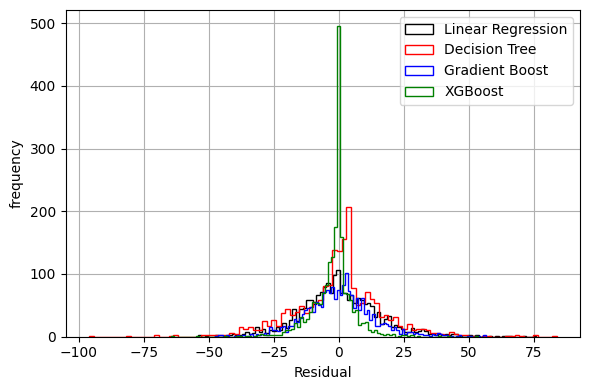

In [1825]:
fig, ax = plt.subplots()
ax.hist(residual_l, bins=100, color="black", label='Linear Regression', histtype='step')
ax.hist(residual_dt, bins=100, color="red", label='Decision Tree', histtype='step')
ax.hist(residual_gb, bins=100, color="blue", label='Gradient Boost', histtype='step')
ax.hist(residual_xgb, bins=100, color="green", label='XGBoost', histtype='step')
ax.set_xlabel('Residual')
ax.set_ylabel('frequency')
ax.legend(loc='upper right')
ax.grid(True)
fig.tight_layout()
plt.rcParams["figure.figsize"] = [6,4]
plt.show()